In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import random

In [2]:
def seed_everything(seed):
  random.seed(seed)
  os.environ['PYTHONHASHEED'] = str(seed)
  np.random.seed(seed)
seed_everything(42)

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submit = pd.read_csv("./submit.csv")

In [4]:
train.head(5)

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [5]:
test.head(5)

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


In [6]:
submit.head(5)

,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TEST_00001,1.462200,1.192973,1.138615,12.952805,30.971239,16.261593,3.209757,-26.133187,-26.148061,-22.172857,24.463823,-26.078327,-26.071199,-26.087317
1,TEST_00002,1.500052,1.218114,1.147487,13.167588,30.887591,16.507907,3.188970,-26.113221,-26.122922,-22.263707,24.407033,-26.056742,-26.052479,-26.067898
2,TEST_00003,1.382944,1.067200,1.021300,14.608024,31.843679,16.224268,3.049995,-26.059612,-26.079587,-22.348805,24.457127,-26.006036,-26.002194,-26.010814
3,TEST_00004,1.353563,1.044562,0.966873,15.251977,32.197070,16.598532,2.987221,-26.076495,-26.095588,-22.209871,24.489625,-26.024492,-26.022156,-26.031402
4,TEST_00005,1.314087,0.958506,0.934164,14.378596,31.146313,16.356404,3.159202,-26.190404,-26.209675,-22.526759,24.217356,-26.136029,-26.127112,-26.140593


In [7]:
x_feature_info = pd.read_csv("./meta/x_feature_info.csv")

In [8]:
x_feature_info

,Feature,설명
0,X_01,PCB 체결 시 단계별 누름량(Step 1)
1,X_02,PCB 체결 시 단계별 누름량(Step 2)
2,X_03,방열 재료 1 무게
3,X_04,1차 검사 통과 여부
4,X_05,PCB 체결 시 단계별 누름량(Step 3)
5,X_06,PCB 체결 시 단계별 누름량(Step 4)
6,X_07,방열 재료 1 면적
7,X_08,방열 재료 2 면적
8,X_09,방열 재료 3 면적
9,X_10,방열 재료 2 무게


In [9]:
y_feature_info = pd.read_csv("./meta/y_feature_info.csv")
y_feature_info

,Feature,설명
0,Y_01,안테나 Gain 평균 (각도1)
1,Y_02,안테나 1 Gain 편차
2,Y_03,안테나 2 Gain 편차
3,Y_04,평균 신호대 잡음비
4,Y_05,안테나 Gain 평균 (각도2)
5,Y_06,신호대 잡음비 (각도1)
6,Y_07,안테나 Gain 평균 (각도3)
7,Y_08,신호대 잡음비 (각도2)
8,Y_09,신호대 잡음비 (각도3)
9,Y_10,신호대 잡음비 (각도4)


In [10]:
y_feature_spec_info = pd.read_csv("./meta/y_feature_spec_info.csv")
y_feature_spec_info

,Feature,최소,최대
0,Y_01,0.2,2.0
1,Y_02,0.2,2.1
2,Y_03,0.2,2.1
3,Y_04,7.0,19.0
4,Y_05,22.0,36.5
5,Y_06,-19.2,19.0
6,Y_07,2.4,4.0
7,Y_08,-29.2,-24.0
8,Y_09,-29.2,-24.0
9,Y_10,-30.6,-20.0


In [11]:
train_x = train.filter(regex='X')
train_y = train.filter(regex='Y')

In [12]:
submit_df = test[['ID']]

In [13]:
#test_x
test = pd.read_csv("./test.csv").drop(columns = ['ID'])
test.head(5)

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,0.0,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,0.0,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,0.0,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,0.0,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,0.0,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


# Dataset 구성 - Feature engineering
Concept: 모델의 예측을 방해하는 의미가 덜한 Feature을 줄여보자.
Try4에서 평균값으로 한 시도를 중앙값으로 시도
- 컬럼 수 줄이기. 비슷한 수치를 갖는 컬럼은 중앙값으로 합쳐보자 (결측치로 인한 평균의 오류 피해보자)
    - 학습 시 부여되는 가중치(weight)를 다르게 할 수 있지 않을까
- 하나의 컬럼이 한 종류의 Feature을 대표할 수 있도록 구성해 보자. (Feature 총 56개 컬럼 -> 16개 컬럼으로)

## X(feature) 데이터 묶음: 17groups
-> EDA 이후 1group 탈락, 16groups로 modeling

PCB 체결 시 단계별 누름량
-> EDA 결과에 따라 2 제거, 1과 6은 평균 계산 후 적용

In [14]:
temp = train_x[['X_01', 'X_06']].median(axis=1)
x_group_01 = pd.concat([temp, train_x[['X_05']]], axis=1)
x_group_01

,0,X_05
0,72.7635,101.892
1,71.2335,101.944
2,72.7630,103.153
3,74.2925,101.971
4,70.2140,101.981
...,...,...
39602,66.6450,103.150
39603,66.6450,102.021
39604,68.6840,103.144
39605,67.1550,102.025


방열 재료 무게
-> EDA 결과에 따라 10, 11 제거

In [15]:
x_group_02 = train_x[['X_03']]
x_group_02

,X_03
0,67.47
1,65.17
2,64.07
3,67.57
4,63.57
...,...
39602,62.27
39603,62.77
39604,64.67
39605,63.67


방열 재료 면적 -> 모두 유지

In [16]:
x_group_03 = train_x[['X_07','X_08','X_09']]
x_group_03

,X_07,X_08,X_09
0,29.45,62.38,245.71
1,28.73,61.23,233.61
2,28.81,105.77,272.20
3,28.92,115.21,255.36
4,29.68,103.38,241.46
...,...,...,...
39602,30.20,77.83,298.05
39603,29.21,102.25,270.67
39604,29.96,102.61,198.07
39605,30.30,112.60,275.52


검사 통과 여부 -> 모두 제거

In [17]:
train_x[['X_04','X_23','X_47','X_48']]

,X_04,X_23,X_47,X_48
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
39602,1,1,1,1
39603,1,1,1,1
39604,1,1,1,1
39605,1,1,1,1


커넥터 위치 기준 좌표 -> 유지

In [18]:
x_group_04 = train_x[['X_12']]
x_group_04

,X_12
0,4.34
1,4.38
2,4.36
3,4.33
4,4.35
...,...
39602,4.36
39603,4.40
39604,4.38
39605,4.33


안테나 패드 위치 차이 -> 유지

In [19]:
x_group_05 = train_x[['X_13']]
x_group_05

,X_13
0,0.18
1,0.18
2,0.15
3,0.21
4,0.16
...,...
39602,0.15
39603,0.13
39604,0.14
39605,0.16


안테나 패드 위치 -> 평균값 적용

In [20]:
x_group_06 = train_x[['X_14','X_15','X_16','X_17']].median(axis=1).to_frame(name='X_14')
x_group_06

,X_14
0,13.385
1,13.395
2,13.375
3,13.360
4,13.380
...,...
39602,13.445
39603,13.415
39604,13.430
39605,13.415


스크류 삽입 깊이 -> 평균값 적용

In [21]:
x_group_07 = train_x[['X_19','X_20','X_21','X_22']].median(axis=1).to_frame(name='X_19')
x_group_07

,X_19
0,3.120
1,3.040
2,3.040
3,3.035
4,3.055
...,...
39602,3.095
39603,3.060
39604,3.105
39605,3.120


커넥터 핀 치수 -> 평균값 적용

In [22]:
x_group_08 = train_x[['X_24','X_25','X_26','X_27','X_28','X_29']].median(axis=1).to_frame(name='X_24')
x_group_08

,X_24
0,2.060
1,2.100
2,2.070
3,2.060
4,2.105
...,...
39602,2.105
39603,2.120
39604,2.105
39605,2.060


스크류 삽입 깊이 -> 평균값 적용

In [23]:
x_group_09 = train_x[['X_30','X_31','X_32','X_33']].median(axis=1).to_frame(name='X_30')
x_group_09

,X_30
0,1.590
1,1.575
2,1.585
3,1.575
4,1.585
...,...
39602,1.485
39603,1.540
39604,1.485
39605,1.465


스크류 체결 시 분당 회전수 -> 평균값 적용

In [24]:
x_group_10 = train_x[['X_34','X_35','X_36','X_37']].median(axis=1).to_frame(name='X_34')
x_group_10

,X_34
0,12.940
1,12.905
2,12.920
3,12.945
4,12.935
...,...
39602,12.920
39603,12.880
39604,12.980
39605,12.935


하우징 PCB 안착부 치수 -> 평균값 적용

In [25]:
x_group_11 = train_x[['X_38','X_39','X_40']].median(axis=1).to_frame(name='X_38')
x_group_11

,X_38
0,-16.41
1,-16.11
2,-16.17
3,-16.05
4,-16.25
...,...
39602,-16.15
39603,-15.74
39604,-16.19
39605,-16.36


레이돔 치수 -> 평균값 적용

In [26]:
x_group_12 = train_x[['X_41','X_42','X_43','X_44']].median(axis=1).to_frame(name='X_41')
x_group_12

,X_41
0,21.145
1,21.145
2,21.125
3,21.135
4,21.130
...,...
39602,21.180
39603,21.175
39604,21.180
39605,21.140


In [27]:
x_group_13 = train_x[['X_45']]
x_group_13

,X_45
0,0.29
1,0.13
2,0.14
3,0.22
4,0.22
...,...
39602,0.11
39603,0.12
39604,0.13
39605,0.11


In [28]:
x_group_14 = train_x[['X_46']]
x_group_14

,X_46
0,1463
1,1463
2,1468
3,1469
4,1469
...,...
39602,1469
39603,1458
39604,1459
39605,1469


In [29]:
x_group_15 = train_x[['X_49']]
x_group_15

,X_49
0,9706.03
1,10423.43
2,10948.53
3,15007.03
4,11051.03
...,...
39602,60630.73
39603,60763.43
39604,8813.33
39605,62222.33


RF 부분 SMT 납 량 -> 평균값 적용

In [30]:
x_group_16 = train_x[['X_50','X_51','X_52','X_53','X_54','X_55','X_56']].median(axis=1).to_frame(name='X_50')
x_group_16

,X_50
0,135.359219
1,133.736691
2,131.055355
3,134.138760
4,134.853555
...,...
39602,129.965741
39603,122.987209
39604,132.501286
39605,128.189679


## Y(target) 데이터 묶음: 4groups

In [31]:
#안테나 Gain 평균 (4개 각도별)
y_group_01 = train_y[['Y_01', 'Y_05', 'Y_07', 'Y_11']]
y_group_01

,Y_01,Y_05,Y_07,Y_11
0,2.056,29.632,4.276,23.792
1,1.446,33.179,3.229,24.691
2,1.251,31.801,2.839,24.649
3,1.464,34.503,3.144,24.913
4,0.983,32.602,3.138,25.299
...,...,...,...,...
39602,1.382,29.194,3.410,24.261
39603,1.482,29.859,3.406,23.427
39604,1.117,24.720,3.215,24.301
39605,0.895,26.412,4.216,23.305


In [32]:
#안테나 Gain 편차
y_group_02 = train_y[['Y_02', 'Y_03']]
y_group_02

,Y_02,Y_03
0,1.456,1.680
1,1.184,1.268
2,0.665,0.782
3,1.079,1.052
4,0.646,0.689
...,...,...
39602,1.215,1.263
39603,0.606,1.083
39604,1.154,0.993
39605,0.187,0.477


In [33]:
#평균 신호대 잡음비
y_group_03 = train_y[['Y_04']]
y_group_03

,Y_04
0,10.502
1,18.507
2,14.082
3,16.975
4,15.047
...,...
39602,10.874
39603,8.759
39604,13.159
39605,9.123


In [34]:
#신호대 잡음비 (7개 각도별)
y_group_04 = train_y[['Y_06', 'Y_08', 'Y_09', 'Y_10', 'Y_12', 'Y_13', 'Y_14']]
y_group_04

,Y_06,Y_08,Y_09,Y_10,Y_12,Y_13,Y_14
0,16.083,-25.381,-25.529,-22.769,-25.470,-25.409,-25.304
1,16.736,-26.619,-26.523,-22.574,-26.253,-26.497,-26.438
2,17.080,-26.238,-26.216,-22.169,-26.285,-26.215,-26.370
3,17.143,-25.426,-25.079,-21.765,-25.254,-25.021,-25.345
4,17.569,-25.376,-25.242,-21.072,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...
39602,16.582,-26.486,-26.581,-22.772,-26.491,-26.584,-26.580
39603,15.659,-27.308,-27.203,-24.674,-27.250,-27.334,-27.325
39604,16.823,-26.502,-26.687,-22.577,-26.388,-26.425,-26.601
39605,15.757,-26.760,-26.634,-24.066,-26.536,-26.751,-26.635


# EDA
https://dacon.io/competitions/official/235927/codeshare/6052?page=1&dtype=recent 참고해 진행

## Test 데이터도 같은 형식으로 구성

In [35]:
temp = test[['X_01', 'X_06']].median(axis=1)
x_test_group_01 = pd.concat([temp, test[['X_05']]], axis=1)
x_test_group_01

,0,X_05
0,71.2335,101.867
1,67.6650,101.992
2,73.2730,101.884
3,71.7435,101.866
4,74.2930,101.891
...,...,...
39603,68.6840,103.157
39604,68.6840,103.137
39605,69.7040,103.149
39606,67.6650,103.148


In [36]:
x_test_group_02 = test[['X_03']]
x_test_group_02

,X_03
0,76.67
1,69.37
2,68.97
3,65.87
4,66.67
...,...
39603,63.97
39604,61.37
39605,63.67
39606,61.77


In [37]:
x_test_group_03 = test[['X_07','X_08','X_09']]
x_test_group_03

,X_07,X_08,X_09
0,30.51,63.57,239.80
1,28.03,116.99,189.23
2,29.65,205.68,214.93
3,28.15,103.38,180.80
4,29.92,71.20,231.93
...,...,...,...
39603,29.49,116.35,284.16
39604,32.29,116.28,272.41
39605,30.00,113.05,295.54
39606,32.05,115.05,267.26


In [38]:
test[['X_04','X_23','X_47','X_48']]

,X_04,X_23,X_47,X_48
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
39603,1,1,1,1
39604,1,1,1,1
39605,1,1,1,1
39606,1,1,1,1


In [39]:
x_test_group_04 = test[['X_12']]
x_test_group_04

,X_12
0,4.37
1,4.36
2,4.43
3,4.39
4,4.38
...,...
39603,4.35
39604,4.34
39605,4.38
39606,4.37


In [40]:
x_test_group_05 = test[['X_13']]
x_test_group_05

,X_13
0,0.15
1,0.17
2,0.20
3,0.18
4,0.12
...,...
39603,0.14
39604,0.16
39605,0.16
39606,0.16


In [41]:
x_test_group_06 = test[['X_14','X_15','X_16','X_17']].median(axis=1).to_frame(name='X_14')
x_test_group_06

,X_14
0,13.450
1,13.415
2,13.375
3,13.395
4,13.420
...,...
39603,13.430
39604,13.425
39605,13.410
39606,13.435


In [42]:
x_test_group_07 = test[['X_19','X_20','X_21','X_22']].median(axis=1).to_frame(name='X_19')
x_test_group_07

,X_19
0,3.295
1,3.280
2,3.095
3,3.170
4,3.185
...,...
39603,3.080
39604,3.075
39605,3.080
39606,3.085


In [43]:
x_test_group_08 = test[['X_24','X_25','X_26','X_27','X_28','X_29']].median(axis=1).to_frame(name='X_24')
x_test_group_08

,X_24
0,2.220
1,2.105
2,2.195
3,2.100
4,2.115
...,...
39603,2.105
39604,2.070
39605,2.115
39606,2.120


In [44]:
x_test_group_09 = test[['X_30','X_31','X_32','X_33']].median(axis=1).to_frame(name='X_30')
x_test_group_09

,X_30
0,1.455
1,1.455
2,1.595
3,1.570
4,1.575
...,...
39603,1.465
39604,1.500
39605,1.510
39606,1.470


In [45]:
x_test_group_10 = test[['X_34','X_35','X_36','X_37']].median(axis=1).to_frame(name='X_34')
x_test_group_10

,X_34
0,12.955
1,12.915
2,12.970
3,12.970
4,13.000
...,...
39603,12.945
39604,12.970
39605,12.935
39606,12.980


In [46]:
x_test_group_11 = test[['X_38','X_39','X_40']].median(axis=1).to_frame(name='X_38')
x_test_group_11

,X_38
0,-16.17
1,-15.35
2,-16.35
3,-16.13
4,-16.17
...,...
39603,-16.26
39604,-16.11
39605,-16.32
39606,-16.05


In [47]:
x_test_group_12 = test[['X_41','X_42','X_43','X_44']].median(axis=1).to_frame(name='X_41')
x_test_group_12

,X_41
0,21.205
1,21.180
2,21.155
3,21.145
4,21.135
...,...
39603,21.175
39604,21.140
39605,21.165
39606,21.185


In [48]:
x_test_group_13 = test[['X_45']]
x_test_group_13

,X_45
0,0.16
1,0.27
2,0.14
3,0.13
4,0.09
...,...
39603,0.11
39604,0.19
39605,0.12
39606,0.11


In [49]:
x_test_group_14 = test[['X_46']]
x_test_group_14

,X_46
0,1469
1,1462
2,1469
3,1469
4,1469
...,...
39603,1469
39604,1469
39605,1469
39606,1469


In [50]:
x_test_group_15 = test[['X_49']]
x_test_group_15

,X_49
0,17227.63
1,17134.53
2,14860.83
3,15252.53
4,10752.23
...,...
39603,62123.53
39604,61844.13
39605,60277.53
39606,60236.73


In [51]:
x_test_group_16 = test[['X_50','X_51','X_52','X_53','X_54','X_55','X_56']].median(axis=1).to_frame(name='X_50')
x_test_group_16

,X_50
0,133.138096
1,132.411480
2,120.450155
3,126.589253
4,135.116192
...,...
39603,128.284572
39604,127.767377
39605,127.671108
39606,129.296909


# Modeling
Try2,3에서와 동일하게 Pycaret 모델링

In [52]:
feature_set = pd.concat([x_group_01, x_group_02, x_group_03, x_group_04, x_group_05, x_group_06, x_group_07, x_group_08, x_group_09, x_group_10, x_group_11, x_group_12, x_group_13, x_group_14, x_group_15, x_group_16], axis=1)
feature_set

,0,X_05,X_03,X_07,X_08,X_09,X_12,X_13,X_14,X_19,X_24,X_30,X_34,X_38,X_41,X_45,X_46,X_49,X_50
0,72.7635,101.892,67.47,29.45,62.38,245.71,4.34,0.18,13.385,3.120,2.060,1.590,12.940,-16.41,21.145,0.29,1463,9706.03,135.359219
1,71.2335,101.944,65.17,28.73,61.23,233.61,4.38,0.18,13.395,3.040,2.100,1.575,12.905,-16.11,21.145,0.13,1463,10423.43,133.736691
2,72.7630,103.153,64.07,28.81,105.77,272.20,4.36,0.15,13.375,3.040,2.070,1.585,12.920,-16.17,21.125,0.14,1468,10948.53,131.055355
3,74.2925,101.971,67.57,28.92,115.21,255.36,4.33,0.21,13.360,3.035,2.060,1.575,12.945,-16.05,21.135,0.22,1469,15007.03,134.138760
4,70.2140,101.981,63.57,29.68,103.38,241.46,4.35,0.16,13.380,3.055,2.105,1.585,12.935,-16.25,21.130,0.22,1469,11051.03,134.853555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.6450,103.150,62.27,30.20,77.83,298.05,4.36,0.15,13.445,3.095,2.105,1.485,12.920,-16.15,21.180,0.11,1469,60630.73,129.965741
39603,66.6450,102.021,62.77,29.21,102.25,270.67,4.40,0.13,13.415,3.060,2.120,1.540,12.880,-15.74,21.175,0.12,1458,60763.43,122.987209
39604,68.6840,103.144,64.67,29.96,102.61,198.07,4.38,0.14,13.430,3.105,2.105,1.485,12.980,-16.19,21.180,0.13,1459,8813.33,132.501286
39605,67.1550,102.025,63.67,30.30,112.60,275.52,4.33,0.16,13.415,3.120,2.060,1.465,12.935,-16.36,21.140,0.11,1469,62222.33,128.189679


In [53]:
test = pd.concat([x_test_group_01, x_test_group_02, x_test_group_03, x_test_group_04, x_test_group_05, x_test_group_06, x_test_group_07, x_test_group_08, x_test_group_09, x_test_group_10, x_test_group_11, x_test_group_12, x_test_group_13, x_test_group_14, x_test_group_15, x_test_group_16], axis=1)
test

,0,X_05,X_03,X_07,X_08,X_09,X_12,X_13,X_14,X_19,X_24,X_30,X_34,X_38,X_41,X_45,X_46,X_49,X_50
0,71.2335,101.867,76.67,30.51,63.57,239.80,4.37,0.15,13.450,3.295,2.220,1.455,12.955,-16.17,21.205,0.16,1469,17227.63,133.138096
1,67.6650,101.992,69.37,28.03,116.99,189.23,4.36,0.17,13.415,3.280,2.105,1.455,12.915,-15.35,21.180,0.27,1462,17134.53,132.411480
2,73.2730,101.884,68.97,29.65,205.68,214.93,4.43,0.20,13.375,3.095,2.195,1.595,12.970,-16.35,21.155,0.14,1469,14860.83,120.450155
3,71.7435,101.866,65.87,28.15,103.38,180.80,4.39,0.18,13.395,3.170,2.100,1.570,12.970,-16.13,21.145,0.13,1469,15252.53,126.589253
4,74.2930,101.891,66.67,29.92,71.20,231.93,4.38,0.12,13.420,3.185,2.115,1.575,13.000,-16.17,21.135,0.09,1469,10752.23,135.116192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,68.6840,103.157,63.97,29.49,116.35,284.16,4.35,0.14,13.430,3.080,2.105,1.465,12.945,-16.26,21.175,0.11,1469,62123.53,128.284572
39604,68.6840,103.137,61.37,32.29,116.28,272.41,4.34,0.16,13.425,3.075,2.070,1.500,12.970,-16.11,21.140,0.19,1469,61844.13,127.767377
39605,69.7040,103.149,63.67,30.00,113.05,295.54,4.38,0.16,13.410,3.080,2.115,1.510,12.935,-16.32,21.165,0.12,1469,60277.53,127.671108
39606,67.6650,103.148,61.77,32.05,115.05,267.26,4.37,0.16,13.435,3.085,2.120,1.470,12.980,-16.05,21.185,0.11,1469,60236.73,129.296909


In [54]:
train_y01 = feature_set.copy()
train_y02 = feature_set.copy()
train_y03 = feature_set.copy()
train_y04 = feature_set.copy()
train_y05 = feature_set.copy()
train_y06 = feature_set.copy()
train_y07 = feature_set.copy()
train_y08 = feature_set.copy()
train_y09 = feature_set.copy()
train_y10 = feature_set.copy()
train_y11 = feature_set.copy()
train_y12 = feature_set.copy()
train_y13 = feature_set.copy()
train_y14 = feature_set.copy()

In [55]:
train_y01['Y_01'] = train['Y_01']
train_y02['Y_02'] = train['Y_02']
train_y03['Y_03'] = train['Y_03']
train_y04['Y_04'] = train['Y_04']
train_y05['Y_05'] = train['Y_05']
train_y06['Y_06'] = train['Y_06']
train_y07['Y_07'] = train['Y_07']
train_y08['Y_08'] = train['Y_08']
train_y09['Y_09'] = train['Y_09']
train_y10['Y_10'] = train['Y_10']
train_y11['Y_11'] = train['Y_11']
train_y12['Y_12'] = train['Y_12']
train_y13['Y_13'] = train['Y_13']
train_y14['Y_14'] = train['Y_14']

In [56]:
train_y14

,0,X_05,X_03,X_07,X_08,X_09,X_12,X_13,X_14,X_19,X_24,X_30,X_34,X_38,X_41,X_45,X_46,X_49,X_50,Y_14
0,72.7635,101.892,67.47,29.45,62.38,245.71,4.34,0.18,13.385,3.120,2.060,1.590,12.940,-16.41,21.145,0.29,1463,9706.03,135.359219,-25.304
1,71.2335,101.944,65.17,28.73,61.23,233.61,4.38,0.18,13.395,3.040,2.100,1.575,12.905,-16.11,21.145,0.13,1463,10423.43,133.736691,-26.438
2,72.7630,103.153,64.07,28.81,105.77,272.20,4.36,0.15,13.375,3.040,2.070,1.585,12.920,-16.17,21.125,0.14,1468,10948.53,131.055355,-26.370
3,74.2925,101.971,67.57,28.92,115.21,255.36,4.33,0.21,13.360,3.035,2.060,1.575,12.945,-16.05,21.135,0.22,1469,15007.03,134.138760,-25.345
4,70.2140,101.981,63.57,29.68,103.38,241.46,4.35,0.16,13.380,3.055,2.105,1.585,12.935,-16.25,21.130,0.22,1469,11051.03,134.853555,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.6450,103.150,62.27,30.20,77.83,298.05,4.36,0.15,13.445,3.095,2.105,1.485,12.920,-16.15,21.180,0.11,1469,60630.73,129.965741,-26.580
39603,66.6450,102.021,62.77,29.21,102.25,270.67,4.40,0.13,13.415,3.060,2.120,1.540,12.880,-15.74,21.175,0.12,1458,60763.43,122.987209,-27.325
39604,68.6840,103.144,64.67,29.96,102.61,198.07,4.38,0.14,13.430,3.105,2.105,1.485,12.980,-16.19,21.180,0.13,1459,8813.33,132.501286,-26.601
39605,67.1550,102.025,63.67,30.30,112.60,275.52,4.33,0.16,13.415,3.120,2.060,1.465,12.935,-16.36,21.140,0.11,1469,62222.33,128.189679,-26.635


In [57]:
from pycaret.regression import *

In [58]:
reg101 = setup(data = train_y01, target = 'Y_01')

,Description,Value
0,Session id,1974
1,Target,Y_01
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [59]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2698,0.1225,0.3499,0.0428,0.1532,0.2800,0.0810
gbr,Gradient Boosting Regressor,0.2697,0.1227,0.3502,0.0412,0.1536,0.2851,1.4630
rf,Random Forest Regressor,0.2711,0.1234,0.3513,0.0353,0.1538,0.2796,3.3750
et,Extra Trees Regressor,0.2709,0.1235,0.3514,0.0348,0.1540,0.2845,1.3940
ridge,Ridge Regression,0.2738,0.1258,0.3547,0.0165,0.1556,0.2915,0.0330
lr,Linear Regression,0.2738,0.1258,0.3547,0.0164,0.1556,0.2915,0.4970
lar,Least Angle Regression,0.2738,0.1258,0.3547,0.0164,0.1556,0.2915,0.0320
br,Bayesian Ridge,0.2738,0.1258,0.3547,0.0164,0.1557,0.2915,0.0360
omp,Orthogonal Matching Pursuit,0.2759,0.1277,0.3573,0.0021,0.1568,0.2933,0.0350
lasso,Lasso Regression,0.2761,0.1279,0.3575,0.0007,0.1568,0.2932,0.0300


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2673,0.1186,0.3444,0.0450,0.1513,0.2496
1,0.2696,0.1231,0.3508,0.0542,0.1557,0.3325
2,0.2712,0.1232,0.3509,0.0382,0.1545,0.2981
3,0.2699,0.1220,0.3493,0.0546,0.1544,0.2704
4,0.2632,0.1178,0.3432,0.0544,0.1494,0.2813
5,0.2695,0.1240,0.3521,0.0388,0.1551,0.2970
6,0.2675,0.1198,0.3461,0.0428,0.1505,0.2686
7,0.2739,0.1286,0.3586,0.0518,0.1571,0.3224
8,0.2710,0.1237,0.3516,0.0373,0.1530,0.2618


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [60]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2673,0.1186,0.3444,0.0450,0.1513,0.2496
1,0.2696,0.1231,0.3508,0.0542,0.1557,0.3325
2,0.2712,0.1232,0.3509,0.0382,0.1545,0.2981
3,0.2699,0.1220,0.3493,0.0546,0.1544,0.2704
4,0.2632,0.1178,0.3432,0.0544,0.1494,0.2813
5,0.2695,0.1240,0.3521,0.0388,0.1551,0.2970
6,0.2675,0.1198,0.3461,0.0428,0.1505,0.2686
7,0.2739,0.1286,0.3586,0.0518,0.1571,0.3224
8,0.2710,0.1237,0.3516,0.0373,0.1530,0.2618


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [61]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2663,0.1179,0.3434,0.0506,0.1509,0.2492
1,0.2692,0.1229,0.3505,0.0558,0.1556,0.3337
2,0.2711,0.1231,0.3508,0.0389,0.1543,0.2974
3,0.2697,0.1221,0.3494,0.0539,0.1545,0.2707
4,0.2636,0.1179,0.3433,0.0537,0.1495,0.2833
5,0.2698,0.1241,0.3522,0.0383,0.1553,0.2996
6,0.2676,0.1200,0.3464,0.0415,0.1507,0.2703
7,0.2740,0.1289,0.3590,0.0494,0.1573,0.3242
8,0.2709,0.1235,0.3515,0.0382,0.1531,0.2626


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=1974)),
                                                            ('Gradient '
                                                             'Boosting '
                                                             'Regressor',
                                                             GradientBoostingRegressor(random_state=1974))],
                                                n_jobs=-1),
                 random_state=1974)

Finished loading model, total used 100 iterations


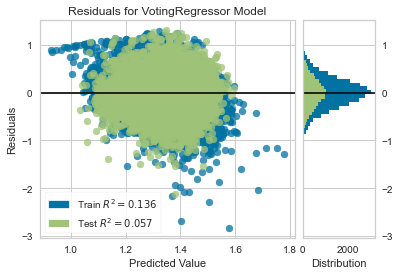

In [62]:
plot_model(tuned_blender)

In [63]:
submit_df['Y_01'] = predict_model(tuned_blender, data=test)['prediction_label']

In [64]:
reg102 = setup(data = train_y02, target = 'Y_02')

,Description,Value
0,Session id,559
1,Target,Y_02
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [65]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2984,0.1437,0.3790,0.0387,0.1879,0.5462,1.3400
lightgbm,Light Gradient Boosting Machine,0.2983,0.1437,0.3790,0.0386,0.1878,0.5365,0.1020
rf,Random Forest Regressor,0.2992,0.1443,0.3799,0.0343,0.1884,0.5417,3.3140
et,Extra Trees Regressor,0.2995,0.1445,0.3801,0.0333,0.1885,0.5432,1.3050
lr,Linear Regression,0.3012,0.1459,0.3820,0.0235,0.1895,0.5593,0.0810
ridge,Ridge Regression,0.3012,0.1459,0.3820,0.0235,0.1895,0.5594,0.0320
lar,Least Angle Regression,0.3012,0.1459,0.3820,0.0235,0.1895,0.5593,0.0310
br,Bayesian Ridge,0.3012,0.1460,0.3820,0.0235,0.1895,0.5594,0.0200
omp,Orthogonal Matching Pursuit,0.3034,0.1479,0.3846,0.0102,0.1909,0.5631,0.0380
lasso,Lasso Regression,0.3051,0.1493,0.3864,0.0009,0.1918,0.5569,0.0360


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3006,0.1439,0.3793,0.0382,0.1895,0.5281
1,0.2924,0.1410,0.3754,0.0342,0.1854,0.5176
2,0.2994,0.1465,0.3827,0.0439,0.1882,0.5271
3,0.2952,0.1368,0.3699,0.0434,0.1849,0.5355
4,0.2989,0.1464,0.3826,0.0439,0.1885,0.5709
5,0.2957,0.1409,0.3754,0.0447,0.1854,0.5486
6,0.2988,0.1417,0.3764,0.0386,0.1870,0.5556
7,0.3066,0.1517,0.3895,0.0312,0.1927,0.5035
8,0.2939,0.1405,0.3748,0.0637,0.1853,0.5236


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [66]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3006,0.1439,0.3793,0.0382,0.1895,0.5281
1,0.2924,0.1410,0.3754,0.0342,0.1854,0.5176
2,0.2994,0.1465,0.3827,0.0439,0.1882,0.5271
3,0.2952,0.1368,0.3699,0.0434,0.1849,0.5355
4,0.2989,0.1464,0.3826,0.0439,0.1885,0.5709
5,0.2957,0.1409,0.3754,0.0447,0.1854,0.5486
6,0.2988,0.1417,0.3764,0.0386,0.1870,0.5556
7,0.3066,0.1517,0.3895,0.0312,0.1927,0.5035
8,0.2939,0.1405,0.3748,0.0637,0.1853,0.5236


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [67]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3003,0.1435,0.3788,0.0406,0.1894,0.5274
1,0.2923,0.1404,0.3747,0.0379,0.1850,0.5171
2,0.2982,0.1456,0.3815,0.0499,0.1877,0.5274
3,0.2944,0.1361,0.3690,0.0483,0.1844,0.5328
4,0.2995,0.1465,0.3828,0.0428,0.1886,0.5738
5,0.2952,0.1406,0.3750,0.0469,0.1851,0.5493
6,0.2983,0.1413,0.3759,0.0411,0.1868,0.5547
7,0.3062,0.1514,0.3892,0.0329,0.1926,0.5045
8,0.2935,0.1405,0.3748,0.0637,0.1853,0.5281


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Gradient '
                                                             'Boosting '
                                                             'Regressor',
                                                             GradientBoostingRegressor(random_state=559)),
                                                            ('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=559))],
                                                n_jobs=-1),
                 random_state=559)

In [68]:
submit_df['Y_02'] = predict_model(tuned_blender, data=test)['prediction_label']

In [69]:
reg103 = setup(data = train_y03, target = 'Y_03')

,Description,Value
0,Session id,4656
1,Target,Y_03
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [70]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2795,0.1270,0.3563,0.0330,0.1786,0.4018,1.5200
lightgbm,Light Gradient Boosting Machine,0.2797,0.1270,0.3564,0.0325,0.1785,0.3982,0.0710
rf,Random Forest Regressor,0.2803,0.1273,0.3568,0.0301,0.1789,0.4008,3.5080
et,Extra Trees Regressor,0.2809,0.1283,0.3581,0.0231,0.1796,0.4043,1.4580
lr,Linear Regression,0.2824,0.1294,0.3596,0.0148,0.1805,0.4099,0.0760
ridge,Ridge Regression,0.2824,0.1293,0.3596,0.0148,0.1805,0.4100,0.0350
lar,Least Angle Regression,0.2824,0.1294,0.3596,0.0148,0.1805,0.4099,0.0340
br,Bayesian Ridge,0.2824,0.1294,0.3596,0.0148,0.1805,0.4100,0.0310
omp,Orthogonal Matching Pursuit,0.2845,0.1309,0.3618,0.0031,0.1816,0.4138,0.0320
lasso,Lasso Regression,0.2847,0.1311,0.3621,0.0015,0.1818,0.4137,0.0330


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2790,0.1260,0.3550,0.0382,0.1784,0.4142
1,0.2820,0.1275,0.3571,0.0280,0.1794,0.3918
2,0.2783,0.1277,0.3574,0.0279,0.1794,0.4324
3,0.2749,0.1215,0.3486,0.0420,0.1761,0.3972
4,0.2771,0.1272,0.3566,0.0384,0.1784,0.4234
5,0.2814,0.1293,0.3596,0.0433,0.1780,0.3730
6,0.2788,0.1262,0.3553,0.0398,0.1775,0.3954
7,0.2771,0.1242,0.3524,0.0374,0.1764,0.3859
8,0.2820,0.1291,0.3593,0.0367,0.1797,0.3811


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [71]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2790,0.1260,0.3550,0.0382,0.1784,0.4142
1,0.2820,0.1275,0.3571,0.0280,0.1794,0.3918
2,0.2783,0.1277,0.3574,0.0279,0.1794,0.4324
3,0.2749,0.1215,0.3486,0.0420,0.1761,0.3972
4,0.2771,0.1272,0.3566,0.0384,0.1784,0.4234
5,0.2814,0.1293,0.3596,0.0433,0.1780,0.3730
6,0.2788,0.1262,0.3553,0.0398,0.1775,0.3954
7,0.2771,0.1242,0.3524,0.0374,0.1764,0.3859
8,0.2820,0.1291,0.3593,0.0367,0.1797,0.3811


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [72]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2784,0.1253,0.3539,0.0438,0.1780,0.4152
1,0.2814,0.1270,0.3564,0.0320,0.1790,0.3908
2,0.2776,0.1270,0.3564,0.0335,0.1789,0.4320
3,0.2751,0.1216,0.3488,0.0409,0.1763,0.3983
4,0.2772,0.1268,0.3561,0.0407,0.1783,0.4283
5,0.2817,0.1296,0.3600,0.0416,0.1782,0.3756
6,0.2786,0.1262,0.3553,0.0397,0.1775,0.3956
7,0.2779,0.1246,0.3530,0.0337,0.1768,0.3890
8,0.2817,0.1289,0.3590,0.0382,0.1796,0.3816


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Gradient '
                                                             'Boosting '
                                                             'Regressor',
                                                             GradientBoostingRegressor(random_state=4656)),
                                                            ('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=4656))],
                                                n_jobs=-1),
                 random_state=4656)

In [73]:
submit_df['Y_03'] = predict_model(tuned_blender, data=test)['prediction_label']

In [74]:
reg104 = setup(data = train_y04, target = 'Y_04')

,Description,Value
0,Session id,4162
1,Target,Y_04
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [75]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.0697,6.7615,2.5960,0.0696,0.1898,0.1707,3.3130
et,Extra Trees Regressor,2.0783,6.8000,2.6032,0.0645,0.1903,0.1714,1.3680
lightgbm,Light Gradient Boosting Machine,2.0802,6.8113,2.6056,0.0626,0.1908,0.1721,0.2490
gbr,Gradient Boosting Regressor,2.0996,6.9058,2.6239,0.0494,0.1921,0.1738,1.6160
xgboost,Extreme Gradient Boosting,2.1082,7.1051,2.6616,0.0216,0.1939,0.1738,1.0350
ridge,Ridge Regression,2.1387,7.1224,2.6650,0.0191,0.1950,0.1771,0.0300
br,Bayesian Ridge,2.1387,7.1225,2.6651,0.0191,0.1950,0.1771,0.0350
lr,Linear Regression,2.1385,7.1223,2.6650,0.0191,0.1950,0.1770,0.0610
lar,Least Angle Regression,2.1386,7.1235,2.6653,0.0189,0.1950,0.1770,0.0170
omp,Orthogonal Matching Pursuit,2.1556,7.2195,2.6832,0.0056,0.1962,0.1785,0.0270


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1303,9.2344,3.0388,0.0415,0.1923,0.1711
1,2.0309,6.3489,2.5197,0.0860,0.1872,0.1663
2,2.0532,6.4079,2.5314,0.0706,0.1878,0.1677
3,2.0326,6.2407,2.4981,0.0852,0.1836,0.1650
4,2.0508,6.4274,2.5352,0.0824,0.1889,0.1690
5,2.0777,6.5586,2.5610,0.0772,0.1907,0.1710
6,2.0611,6.5237,2.5542,0.0689,0.1917,0.1702
7,2.1002,6.6241,2.5737,0.0760,0.1920,0.1734
8,2.0356,6.2764,2.5053,0.0754,0.1890,0.1797


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [76]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1303,9.2344,3.0388,0.0415,0.1923,0.1711
1,2.0309,6.3489,2.5197,0.0860,0.1872,0.1663
2,2.0532,6.4079,2.5314,0.0706,0.1878,0.1677
3,2.0326,6.2407,2.4981,0.0852,0.1836,0.1650
4,2.0508,6.4274,2.5352,0.0824,0.1889,0.1690
5,2.0777,6.5586,2.5610,0.0772,0.1907,0.1710
6,2.0611,6.5237,2.5542,0.0689,0.1917,0.1702
7,2.1002,6.6241,2.5737,0.0760,0.1920,0.1734
8,2.0356,6.2764,2.5053,0.0754,0.1890,0.1797


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [77]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1279,9.2158,3.0358,0.0434,0.1920,0.1710
1,2.0334,6.3435,2.5186,0.0868,0.1872,0.1666
2,2.0540,6.3889,2.5276,0.0734,0.1877,0.1679
3,2.0419,6.2513,2.5003,0.0836,0.1839,0.1659
4,2.0543,6.4253,2.5348,0.0827,0.1890,0.1695
5,2.0818,6.5559,2.5604,0.0776,0.1909,0.1716
6,2.0586,6.5108,2.5516,0.0708,0.1916,0.1702
7,2.1045,6.6415,2.5771,0.0736,0.1923,0.1739
8,2.0481,6.3397,2.5179,0.0660,0.1899,0.1811


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=4162)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1,
                                                 random_state=4162))],
                n_jobs=-1)

In [78]:
submit_df['Y_04'] = predict_model(tuned_blender, data=test)['prediction_label']

In [79]:
reg105 = setup(data = train_y05, target = 'Y_05')

,Description,Value
0,Session id,3807
1,Target,Y_05
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [80]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.9853,6.2317,2.4959,0.0316,0.0804,0.0658,0.0530
gbr,Gradient Boosting Regressor,1.9898,6.2490,2.4994,0.0289,0.0806,0.0660,0.7260
rf,Random Forest Regressor,1.9994,6.2570,2.5010,0.0275,0.0805,0.0661,3.7290
et,Extra Trees Regressor,2.0026,6.2921,2.5080,0.0221,0.0807,0.0662,1.3250
lr,Linear Regression,2.0105,6.3601,2.5215,0.0116,0.0813,0.0667,0.3690
lar,Least Angle Regression,2.0105,6.3601,2.5215,0.0116,0.0813,0.0667,0.0280
ridge,Ridge Regression,2.0105,6.3607,2.5216,0.0115,0.0813,0.0667,0.0300
br,Bayesian Ridge,2.0105,6.3606,2.5216,0.0115,0.0813,0.0667,0.0370
omp,Orthogonal Matching Pursuit,2.0184,6.4082,2.5310,0.0041,0.0816,0.0670,0.0200
lasso,Lasso Regression,2.0218,6.4344,2.5362,0.0000,0.0817,0.0671,0.2280


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9787,6.1131,2.4725,0.0340,0.0796,0.0655
1,1.9736,6.1091,2.4717,0.0334,0.0796,0.0653
2,2.0059,6.3644,2.5228,0.0296,0.0814,0.0666
3,2.0335,6.4418,2.5381,0.0410,0.0818,0.0674
4,1.9098,5.6831,2.3839,0.0351,0.0761,0.0626
5,1.9886,6.3396,2.5179,0.0294,0.0812,0.0660
6,2.0048,6.4884,2.5472,0.0236,0.0826,0.0670
7,1.9533,5.9801,2.4454,0.0381,0.0788,0.0647
8,2.0112,6.4127,2.5323,0.0345,0.0819,0.0671


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [81]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9787,6.1131,2.4725,0.0340,0.0796,0.0655
1,1.9736,6.1091,2.4717,0.0334,0.0796,0.0653
2,2.0059,6.3644,2.5228,0.0296,0.0814,0.0666
3,2.0335,6.4418,2.5381,0.0410,0.0818,0.0674
4,1.9098,5.6831,2.3839,0.0351,0.0761,0.0626
5,1.9886,6.3396,2.5179,0.0294,0.0812,0.0660
6,2.0048,6.4884,2.5472,0.0236,0.0826,0.0670
7,1.9533,5.9801,2.4454,0.0381,0.0788,0.0647
8,2.0112,6.4127,2.5323,0.0345,0.0819,0.0671


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [82]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9774,6.1018,2.4702,0.0358,0.0795,0.0655
1,1.9753,6.1079,2.4714,0.0336,0.0796,0.0654
2,1.9997,6.3356,2.5171,0.0339,0.0812,0.0664
3,2.0324,6.4409,2.5379,0.0412,0.0818,0.0674
4,1.9128,5.6884,2.3850,0.0342,0.0761,0.0627
5,1.9886,6.3500,2.5199,0.0278,0.0813,0.0660
6,2.0055,6.4857,2.5467,0.0240,0.0826,0.0670
7,1.9503,5.9821,2.4458,0.0378,0.0788,0.0647
8,2.0098,6.4009,2.5300,0.0363,0.0818,0.0670


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=3807)),
                                                            ('Gradient '
                                                             'Boosting '
                                                             'Regressor',
                                                             GradientBoostingRegressor(random_state=3807))],
                                                n_jobs=-1),
                 random_state=3807)

In [83]:
submit_df['Y_05'] = predict_model(tuned_blender, data=test)['prediction_label']

In [84]:
reg106 = setup(data = train_y06, target = 'Y_06')

,Description,Value
0,Session id,2436
1,Target,Y_06
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [85]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7337,2.8377,1.6650,0.1519,0.0812,0.0444,0.0810
rf,Random Forest Regressor,0.7289,3.0138,1.7195,0.0888,0.0770,0.0440,3.4070
et,Extra Trees Regressor,0.7325,3.1674,1.7540,0.0693,0.0551,0.0441,1.2730
xgboost,Extreme Gradient Boosting,0.7638,3.2070,1.7745,0.0287,0.0899,0.0462,0.8020
gbr,Gradient Boosting Regressor,0.7305,3.3229,1.7954,0.0230,0.0573,0.0441,1.4650
ridge,Ridge Regression,0.7124,3.4040,1.8161,0.0054,0.0465,0.0429,0.0340
lar,Least Angle Regression,0.7127,3.4037,1.8160,0.0054,0.0465,0.0429,0.0320
lr,Linear Regression,0.7126,3.4041,1.8161,0.0053,0.0465,0.0429,0.0850
br,Bayesian Ridge,0.7121,3.4055,1.8164,0.0051,0.0464,0.0429,0.0400
omp,Orthogonal Matching Pursuit,0.7121,3.4174,1.8196,0.0016,0.0464,0.0429,0.0320


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6961,2.4165,1.5545,0.1458,0.0772,0.0421
1,0.6767,1.5530,1.2462,-0.0588,0.0717,0.0410
2,0.7269,3.0795,1.7549,0.0571,0.0953,0.0440
3,0.7667,4.2212,2.0546,0.2237,0.0975,0.0459
4,0.7580,4.1155,2.0287,0.2378,0.0756,0.0455
5,0.7082,2.3436,1.5309,0.1673,0.0773,0.0428
6,0.7188,2.7797,1.6672,0.2299,0.0666,0.0435
7,0.6935,2.6039,1.6137,0.1663,0.0675,0.0419
8,0.7122,1.9243,1.3872,0.1420,0.0660,0.0431


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


In [86]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7435,2.6206,1.6188,0.0736,0.0692,0.0449
1,0.7289,1.7075,1.3067,-0.1641,0.0742,0.0443
2,0.7623,3.0016,1.7325,0.0810,0.0927,0.0462
3,0.8082,4.1734,2.0429,0.2325,0.1012,0.0485
4,0.7940,4.2531,2.0623,0.2123,0.0813,0.0477
5,0.7685,2.3942,1.5473,0.1494,0.0932,0.0465
6,0.7678,2.8760,1.6959,0.2032,0.0705,0.0465
7,0.7583,2.7772,1.6665,0.1108,0.0750,0.0459
8,0.7613,2.1108,1.4528,0.0588,0.0706,0.0461


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [87]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6998,2.5330,1.5915,0.1046,0.0591,0.0423
1,0.6714,1.4356,1.1982,0.0212,0.0720,0.0407
2,0.7218,2.9995,1.7319,0.0816,0.0732,0.0437
3,0.7606,4.2425,2.0597,0.2198,0.0767,0.0456
4,0.7644,4.3392,2.0831,0.1964,0.0741,0.0459
5,0.6986,2.1650,1.4714,0.2308,0.0752,0.0423
6,0.7183,2.8190,1.6790,0.2190,0.0664,0.0435
7,0.6984,2.6192,1.6184,0.1614,0.0614,0.0422
8,0.7058,1.9708,1.4038,0.1212,0.0792,0.0428


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=LGBMRegressor(random_state=2436),
                 random_state=2436)

In [88]:
submit_df['Y_06'] = predict_model(tuned_blender, data=test)['prediction_label']

In [89]:
reg107 = setup(data = train_y07, target = 'Y_07')

,Description,Value
0,Session id,1829
1,Target,Y_07
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [90]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3276,0.1691,0.4112,0.0441,0.1005,0.1075,0.4080
rf,Random Forest Regressor,0.3276,0.1693,0.4115,0.0428,0.1006,0.1076,3.3740
gbr,Gradient Boosting Regressor,0.3286,0.1704,0.4128,0.0366,0.1010,0.1079,0.6700
et,Extra Trees Regressor,0.3291,0.1711,0.4136,0.0329,0.1012,0.1082,1.0810
lr,Linear Regression,0.3308,0.1729,0.4158,0.0228,0.1017,0.1087,0.0840
lar,Least Angle Regression,0.3308,0.1729,0.4158,0.0228,0.1017,0.1087,0.0200
ridge,Ridge Regression,0.3308,0.1729,0.4158,0.0227,0.1017,0.1087,0.0280
br,Bayesian Ridge,0.3308,0.1729,0.4158,0.0227,0.1017,0.1087,0.0410
omp,Orthogonal Matching Pursuit,0.3334,0.1754,0.4188,0.0087,0.1025,0.1096,0.0330
lasso,Lasso Regression,0.3350,0.1769,0.4206,-0.0000,0.1030,0.1102,0.0300


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will b

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3254,0.1669,0.4086,0.0540,0.1001,0.1073
1,0.3307,0.1693,0.4114,0.0412,0.1000,0.1081
2,0.3291,0.1699,0.4121,0.0343,0.1007,0.1081
3,0.3215,0.1644,0.4055,0.0577,0.0980,0.1042
4,0.3222,0.1656,0.4070,0.0582,0.0995,0.1057
5,0.3310,0.1688,0.4109,0.0473,0.1003,0.1083
6,0.3224,0.1711,0.4136,0.0766,0.1018,0.1065
7,0.3270,0.1673,0.4091,0.0461,0.0997,0.1068
8,0.3274,0.1675,0.4093,0.0516,0.1014,0.1094


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [91]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3254,0.1669,0.4086,0.0540,0.1001,0.1073
1,0.3307,0.1693,0.4114,0.0412,0.1000,0.1081
2,0.3291,0.1699,0.4121,0.0343,0.1007,0.1081
3,0.3215,0.1644,0.4055,0.0577,0.0980,0.1042
4,0.3222,0.1656,0.4070,0.0582,0.0995,0.1057
5,0.3310,0.1688,0.4109,0.0473,0.1003,0.1083
6,0.3224,0.1711,0.4136,0.0766,0.1018,0.1065
7,0.3270,0.1673,0.4091,0.0461,0.0997,0.1068
8,0.3274,0.1675,0.4093,0.0516,0.1014,0.1094


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightG

In [92]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3261,0.1670,0.4086,0.0538,0.1002,0.1075
1,0.3305,0.1689,0.4110,0.0432,0.1000,0.1081
2,0.3280,0.1690,0.4111,0.0393,0.1005,0.1077
3,0.3221,0.1649,0.4061,0.0550,0.0982,0.1045
4,0.3222,0.1657,0.4071,0.0576,0.0995,0.1057
5,0.3310,0.1686,0.4106,0.0485,0.1003,0.1083
6,0.3238,0.1729,0.4158,0.0669,0.1025,0.1071
7,0.3260,0.1663,0.4078,0.0523,0.0993,0.1065
8,0.3266,0.1673,0.4090,0.0528,0.1013,0.1090


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will b

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=1829)),
                                                            ('Random Forest '
                                                             'Regressor',
                                                             RandomForestRegressor(n_jobs=-1,
                                                                                   random_state=1829))],
                                                n_jobs=-1),
                 random_state=1829)

In [93]:
submit_df['Y_07'] = predict_model(tuned_blender, data=test)['prediction_label']

In [94]:
reg108 = setup(data = train_y08, target = 'Y_08')

,Description,Value
0,Session id,1574
1,Target,Y_08
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [95]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4901,0.3973,0.6302,0.0914,0.0230,0.0186,3.2550
lightgbm,Light Gradient Boosting Machine,0.4886,0.3975,0.6304,0.0909,0.0230,0.0185,0.0890
et,Extra Trees Regressor,0.4899,0.3986,0.6313,0.0883,0.0230,0.0186,1.3860
gbr,Gradient Boosting Regressor,0.4917,0.4025,0.6344,0.0793,0.0231,0.0186,1.1240
xgboost,Extreme Gradient Boosting,0.4994,0.4145,0.6437,0.0520,0.0235,0.0189,0.7800
ridge,Ridge Regression,0.5028,0.4200,0.6480,0.0393,0.0236,0.0191,0.0210
lar,Least Angle Regression,0.5028,0.4200,0.6480,0.0393,0.0236,0.0191,0.0320
br,Bayesian Ridge,0.5028,0.4201,0.6480,0.0393,0.0236,0.0191,0.0490
lr,Linear Regression,0.5028,0.4200,0.6480,0.0393,0.0236,0.0191,0.2230
omp,Orthogonal Matching Pursuit,0.5069,0.4274,0.6537,0.0223,0.0238,0.0192,0.0300


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4778,0.3785,0.6152,0.1117,0.0225,0.0181
1,0.4853,0.3862,0.6214,0.1090,0.0227,0.0184
2,0.4837,0.3855,0.6209,0.1171,0.0227,0.0184
3,0.4793,0.3852,0.6206,0.1013,0.0226,0.0182
4,0.4916,0.4017,0.6338,0.0791,0.0231,0.0186
5,0.4835,0.3918,0.6259,0.0870,0.0228,0.0183
6,0.5004,0.4190,0.6473,0.1001,0.0236,0.0190
7,0.4859,0.3845,0.6201,0.0930,0.0226,0.0184
8,0.4944,0.4123,0.6421,0.0999,0.0234,0.0187


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [96]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4778,0.3785,0.6152,0.1117,0.0225,0.0181
1,0.4853,0.3862,0.6214,0.1090,0.0227,0.0184
2,0.4837,0.3855,0.6209,0.1171,0.0227,0.0184
3,0.4793,0.3852,0.6206,0.1013,0.0226,0.0182
4,0.4916,0.4017,0.6338,0.0791,0.0231,0.0186
5,0.4835,0.3918,0.6259,0.0870,0.0228,0.0183
6,0.5004,0.4190,0.6473,0.1001,0.0236,0.0190
7,0.4859,0.3845,0.6201,0.0930,0.0226,0.0184
8,0.4944,0.4123,0.6421,0.0999,0.0234,0.0187


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [97]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4777,0.3774,0.6144,0.1141,0.0224,0.0181
1,0.4869,0.3884,0.6232,0.1038,0.0228,0.0185
2,0.4831,0.3851,0.6206,0.1179,0.0227,0.0184
3,0.4792,0.3848,0.6203,0.1021,0.0226,0.0182
4,0.4905,0.4005,0.6328,0.0818,0.0230,0.0186
5,0.4839,0.3913,0.6256,0.0881,0.0228,0.0183
6,0.5016,0.4203,0.6483,0.0973,0.0236,0.0190
7,0.4851,0.3848,0.6203,0.0924,0.0226,0.0184
8,0.4936,0.4113,0.6413,0.1021,0.0233,0.0187


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Random Forest '
                                                             'Regressor',
                                                             RandomForestRegressor(n_jobs=-1,
                                                                                   random_state=1574)),
                                                            ('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=1574))],
                                                n_jobs=-1),
                 random_state=1574)

In [98]:
submit_df['Y_08'] = predict_model(tuned_blender, data=test)['prediction_label']

In [99]:
reg109 = setup(data = train_y09, target = 'Y_09')

,Description,Value
0,Session id,7062
1,Target,Y_09
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [100]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4863,0.3893,0.6239,0.0919,0.0227,0.0184,3.4010
lightgbm,Light Gradient Boosting Machine,0.4869,0.3918,0.6259,0.0861,0.0228,0.0185,0.0790
et,Extra Trees Regressor,0.4886,0.3920,0.6260,0.0857,0.0228,0.0185,1.3170
gbr,Gradient Boosting Regressor,0.4897,0.3968,0.6298,0.0744,0.0229,0.0186,1.3740
xgboost,Extreme Gradient Boosting,0.4988,0.4112,0.6412,0.0408,0.0234,0.0189,0.8260
ridge,Ridge Regression,0.5002,0.4138,0.6432,0.0347,0.0234,0.0190,0.0270
lar,Least Angle Regression,0.5002,0.4138,0.6432,0.0347,0.0234,0.0190,0.0270
br,Bayesian Ridge,0.5002,0.4138,0.6432,0.0347,0.0234,0.0190,0.0330
lr,Linear Regression,0.5002,0.4138,0.6432,0.0347,0.0234,0.0190,0.0780
omp,Orthogonal Matching Pursuit,0.5038,0.4207,0.6486,0.0186,0.0236,0.0191,0.0270


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4812,0.3681,0.6067,0.1129,0.0221,0.0183
1,0.4937,0.4021,0.6342,0.1023,0.0231,0.0187
2,0.4784,0.3724,0.6103,0.1056,0.0223,0.0182
3,0.4865,0.3953,0.6287,0.1040,0.0229,0.0185
4,0.4846,0.3879,0.6228,0.0977,0.0227,0.0184
5,0.4717,0.3705,0.6087,0.0983,0.0222,0.0179
6,0.4783,0.3833,0.6191,0.0905,0.0225,0.0181
7,0.4987,0.4086,0.6392,0.0811,0.0233,0.0189
8,0.4817,0.3860,0.6213,0.0970,0.0226,0.0182


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [101]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4812,0.3681,0.6067,0.1129,0.0221,0.0183
1,0.4937,0.4021,0.6342,0.1023,0.0231,0.0187
2,0.4784,0.3724,0.6103,0.1056,0.0223,0.0182
3,0.4865,0.3953,0.6287,0.1040,0.0229,0.0185
4,0.4846,0.3879,0.6228,0.0977,0.0227,0.0184
5,0.4717,0.3705,0.6087,0.0983,0.0222,0.0179
6,0.4783,0.3833,0.6191,0.0905,0.0225,0.0181
7,0.4987,0.4086,0.6392,0.0811,0.0233,0.0189
8,0.4817,0.3860,0.6213,0.0970,0.0226,0.0182


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [102]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4814,0.3695,0.6079,0.1094,0.0222,0.0183
1,0.4965,0.4043,0.6359,0.0974,0.0232,0.0188
2,0.4771,0.3712,0.6093,0.1085,0.0222,0.0181
3,0.4869,0.3948,0.6283,0.1052,0.0229,0.0185
4,0.4829,0.3864,0.6216,0.1011,0.0227,0.0183
5,0.4736,0.3728,0.6106,0.0926,0.0222,0.0180
6,0.4793,0.3838,0.6195,0.0892,0.0226,0.0182
7,0.4972,0.4080,0.6388,0.0823,0.0232,0.0188
8,0.4816,0.3864,0.6216,0.0962,0.0226,0.0182


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=7062)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=7062))],
                n_jobs=-1)

In [103]:
submit_df['Y_09'] = predict_model(tuned_blender, data=test)['prediction_label']

In [104]:
reg110 = setup(data = train_y10, target = 'Y_10')

,Description,Value
0,Session id,670
1,Target,Y_10
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [105]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6351,0.7478,0.8641,0.1284,0.0358,0.0280,0.0740
rf,Random Forest Regressor,0.6379,0.7540,0.8676,0.1216,0.0360,0.0282,3.1420
et,Extra Trees Regressor,0.6422,0.7632,0.8727,0.1118,0.0362,0.0284,1.2330
gbr,Gradient Boosting Regressor,0.6410,0.7753,0.8796,0.0977,0.0364,0.0283,1.3410
xgboost,Extreme Gradient Boosting,0.6521,0.7885,0.8873,0.0808,0.0368,0.0288,0.7920
ridge,Ridge Regression,0.6619,0.8234,0.9064,0.0421,0.0375,0.0292,0.0260
lar,Least Angle Regression,0.6619,0.8234,0.9064,0.0421,0.0375,0.0292,0.0300
br,Bayesian Ridge,0.6619,0.8234,0.9064,0.0421,0.0375,0.0292,0.0280
lr,Linear Regression,0.6619,0.8234,0.9064,0.0421,0.0375,0.0292,0.1150
omp,Orthogonal Matching Pursuit,0.6750,0.8476,0.9197,0.0137,0.0381,0.0298,0.0240


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6256,0.7853,0.8862,0.1534,0.0363,0.0275
1,0.6371,0.7145,0.8453,0.1460,0.0353,0.0282
2,0.6210,0.6873,0.8290,0.1276,0.0346,0.0275
3,0.6488,0.8240,0.9077,0.1544,0.0373,0.0285
4,0.6319,0.7343,0.8569,0.1520,0.0355,0.0279
5,0.6385,0.7605,0.8721,0.1645,0.0361,0.0282
6,0.6347,0.7472,0.8644,0.1239,0.0359,0.0280
7,0.6500,0.8439,0.9187,0.0882,0.0377,0.0286
8,0.6154,0.6384,0.7990,0.0971,0.0337,0.0274


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [106]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6256,0.7853,0.8862,0.1534,0.0363,0.0275
1,0.6371,0.7145,0.8453,0.1460,0.0353,0.0282
2,0.6210,0.6873,0.8290,0.1276,0.0346,0.0275
3,0.6488,0.8240,0.9077,0.1544,0.0373,0.0285
4,0.6319,0.7343,0.8569,0.1520,0.0355,0.0279
5,0.6385,0.7605,0.8721,0.1645,0.0361,0.0282
6,0.6347,0.7472,0.8644,0.1239,0.0359,0.0280
7,0.6500,0.8439,0.9187,0.0882,0.0377,0.0286
8,0.6154,0.6384,0.7990,0.0971,0.0337,0.0274


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [107]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6274,0.8001,0.8945,0.1375,0.0366,0.0276
1,0.6360,0.7117,0.8436,0.1493,0.0352,0.0282
2,0.6186,0.6805,0.8250,0.1361,0.0345,0.0274
3,0.6497,0.8296,0.9108,0.1486,0.0374,0.0285
4,0.6327,0.7475,0.8646,0.1367,0.0357,0.0280
5,0.6423,0.7755,0.8806,0.1479,0.0364,0.0283
6,0.6337,0.7545,0.8686,0.1154,0.0360,0.0280
7,0.6481,0.8361,0.9144,0.0966,0.0375,0.0285
8,0.6122,0.6282,0.7926,0.1115,0.0335,0.0272


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=670)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=670))],
                n_jobs=-1)

In [108]:
submit_df['Y_10'] = predict_model(tuned_blender, data=test)['prediction_label']

In [109]:
reg111 = setup(data = train_y11, target = 'Y_11')

,Description,Value
0,Session id,638
1,Target,Y_11
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [110]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.6358,0.6556,0.8096,0.0451,0.0324,0.0264,3.2830
lightgbm,Light Gradient Boosting Machine,0.6352,0.6583,0.8113,0.0412,0.0325,0.0264,0.0830
et,Extra Trees Regressor,0.6385,0.6603,0.8125,0.0382,0.0325,0.0265,1.2550
gbr,Gradient Boosting Regressor,0.6393,0.6649,0.8154,0.0315,0.0326,0.0266,1.3300
lr,Linear Regression,0.6466,0.6798,0.8245,0.0098,0.0330,0.0269,0.1090
ridge,Ridge Regression,0.6466,0.6798,0.8245,0.0098,0.0330,0.0269,0.0410
lar,Least Angle Regression,0.6466,0.6798,0.8245,0.0098,0.0330,0.0269,0.0320
br,Bayesian Ridge,0.6466,0.6799,0.8245,0.0097,0.0330,0.0269,0.0380
xgboost,Extreme Gradient Boosting,0.6476,0.6831,0.8265,0.0049,0.0331,0.0269,0.7950
omp,Orthogonal Matching Pursuit,0.6495,0.6850,0.8276,0.0023,0.0331,0.0270,0.0290


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6399,0.6541,0.8088,0.0529,0.0323,0.0266
1,0.6356,0.6688,0.8178,0.0528,0.0328,0.0264
2,0.6320,0.6399,0.7999,0.0524,0.0319,0.0262
3,0.6089,0.6131,0.7830,0.0557,0.0313,0.0253
4,0.6383,0.6604,0.8126,0.0449,0.0325,0.0265
5,0.6375,0.6570,0.8105,0.0522,0.0324,0.0264
6,0.6213,0.6346,0.7966,0.0548,0.0319,0.0258
7,0.6413,0.6667,0.8165,0.0467,0.0327,0.0266
8,0.6313,0.6557,0.8097,0.0477,0.0324,0.0262


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [111]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6399,0.6541,0.8088,0.0529,0.0323,0.0266
1,0.6356,0.6688,0.8178,0.0528,0.0328,0.0264
2,0.6320,0.6399,0.7999,0.0524,0.0319,0.0262
3,0.6089,0.6131,0.7830,0.0557,0.0313,0.0253
4,0.6383,0.6604,0.8126,0.0449,0.0325,0.0265
5,0.6375,0.6570,0.8105,0.0522,0.0324,0.0264
6,0.6213,0.6346,0.7966,0.0548,0.0319,0.0258
7,0.6413,0.6667,0.8165,0.0467,0.0327,0.0266
8,0.6313,0.6557,0.8097,0.0477,0.0324,0.0262


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [112]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6397,0.6568,0.8104,0.0491,0.0324,0.0266
1,0.6357,0.6670,0.8167,0.0553,0.0327,0.0265
2,0.6327,0.6414,0.8009,0.0502,0.0320,0.0263
3,0.6104,0.6138,0.7834,0.0547,0.0313,0.0253
4,0.6375,0.6586,0.8115,0.0475,0.0325,0.0265
5,0.6358,0.6554,0.8095,0.0546,0.0324,0.0264
6,0.6244,0.6390,0.7994,0.0483,0.0320,0.0260
7,0.6421,0.6668,0.8166,0.0466,0.0327,0.0267
8,0.6348,0.6584,0.8114,0.0437,0.0325,0.0264


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=638)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=638))],
                n_jobs=-1)

In [113]:
submit_df['Y_11'] = predict_model(tuned_blender, data=test)['prediction_label']

In [114]:
reg112 = setup(data = train_y12, target = 'Y_12')

,Description,Value
0,Session id,1685
1,Target,Y_12
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [115]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4892,0.3958,0.6291,0.0859,0.0230,0.0186,3.2540
lightgbm,Light Gradient Boosting Machine,0.4886,0.3968,0.6299,0.0837,0.0230,0.0186,0.0560
et,Extra Trees Regressor,0.4902,0.3980,0.6308,0.0810,0.0230,0.0186,1.2290
gbr,Gradient Boosting Regressor,0.4916,0.4017,0.6337,0.0725,0.0231,0.0187,1.2490
xgboost,Extreme Gradient Boosting,0.5001,0.4137,0.6432,0.0446,0.0235,0.0190,0.7700
ridge,Ridge Regression,0.5022,0.4183,0.6467,0.0340,0.0236,0.0191,0.0290
br,Bayesian Ridge,0.5022,0.4183,0.6468,0.0340,0.0236,0.0191,0.0380
lr,Linear Regression,0.5022,0.4183,0.6468,0.0340,0.0236,0.0191,0.0630
lar,Least Angle Regression,0.5022,0.4184,0.6468,0.0339,0.0236,0.0191,0.0200
omp,Orthogonal Matching Pursuit,0.5056,0.4243,0.6514,0.0202,0.0238,0.0192,0.0290


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4935,0.4034,0.6352,0.0822,0.0232,0.0187
1,0.4828,0.3847,0.6203,0.0902,0.0227,0.0184
2,0.4785,0.3831,0.6189,0.0928,0.0226,0.0182
3,0.4871,0.3901,0.6245,0.0850,0.0229,0.0186
4,0.4847,0.3839,0.6196,0.0924,0.0227,0.0184
5,0.4757,0.3818,0.6179,0.1152,0.0226,0.0181
6,0.4924,0.4017,0.6338,0.0994,0.0231,0.0187
7,0.4938,0.4019,0.6339,0.0855,0.0231,0.0188
8,0.4859,0.3978,0.6307,0.0938,0.0230,0.0185


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [116]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4935,0.4034,0.6352,0.0822,0.0232,0.0187
1,0.4828,0.3847,0.6203,0.0902,0.0227,0.0184
2,0.4785,0.3831,0.6189,0.0928,0.0226,0.0182
3,0.4871,0.3901,0.6245,0.0850,0.0229,0.0186
4,0.4847,0.3839,0.6196,0.0924,0.0227,0.0184
5,0.4757,0.3818,0.6179,0.1152,0.0226,0.0181
6,0.4924,0.4017,0.6338,0.0994,0.0231,0.0187
7,0.4938,0.4019,0.6339,0.0855,0.0231,0.0188
8,0.4859,0.3978,0.6307,0.0938,0.0230,0.0185


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [117]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4928,0.4036,0.6353,0.0819,0.0232,0.0187
1,0.4820,0.3827,0.6186,0.0950,0.0226,0.0183
2,0.4792,0.3841,0.6198,0.0903,0.0226,0.0182
3,0.4863,0.3895,0.6241,0.0863,0.0228,0.0185
4,0.4841,0.3835,0.6193,0.0932,0.0226,0.0184
5,0.4765,0.3834,0.6192,0.1116,0.0226,0.0181
6,0.4921,0.4010,0.6332,0.1010,0.0231,0.0187
7,0.4933,0.4017,0.6338,0.0858,0.0231,0.0187
8,0.4866,0.3997,0.6322,0.0896,0.0231,0.0185


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=1685)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=1685))],
                n_jobs=-1)

In [118]:
submit_df['Y_12'] = predict_model(tuned_blender, data=test)['prediction_label']

In [119]:
reg113 = setup(data = train_y13, target = 'Y_13')

,Description,Value
0,Session id,3732
1,Target,Y_13
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [120]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4871,0.3906,0.6249,0.0869,0.0228,0.0185,3.3040
et,Extra Trees Regressor,0.4884,0.3921,0.6262,0.0833,0.0229,0.0186,1.2500
lightgbm,Light Gradient Boosting Machine,0.4871,0.3922,0.6262,0.0833,0.0229,0.0185,0.0740
gbr,Gradient Boosting Regressor,0.4903,0.3972,0.6302,0.0714,0.0230,0.0186,1.3230
xgboost,Extreme Gradient Boosting,0.4979,0.4094,0.6398,0.0430,0.0234,0.0189,0.7850
ridge,Ridge Regression,0.4998,0.4126,0.6423,0.0354,0.0235,0.0190,0.0190
lar,Least Angle Regression,0.4998,0.4126,0.6423,0.0354,0.0235,0.0190,0.0310
br,Bayesian Ridge,0.4998,0.4127,0.6423,0.0354,0.0235,0.0190,0.0370
lr,Linear Regression,0.4998,0.4126,0.6423,0.0354,0.0235,0.0190,0.0770
omp,Orthogonal Matching Pursuit,0.5041,0.4196,0.6477,0.0192,0.0237,0.0192,0.0330


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4913,0.3891,0.6238,0.1030,0.0228,0.0187
1,0.4859,0.3916,0.6257,0.0823,0.0228,0.0184
2,0.4754,0.3753,0.6126,0.0965,0.0224,0.0181
3,0.4852,0.3851,0.6206,0.0986,0.0227,0.0185
4,0.4891,0.3927,0.6266,0.0859,0.0229,0.0186
5,0.4934,0.4034,0.6351,0.0891,0.0232,0.0188
6,0.4881,0.3987,0.6314,0.0924,0.0230,0.0185
7,0.4747,0.3664,0.6053,0.1060,0.0222,0.0181
8,0.4880,0.3884,0.6232,0.0840,0.0228,0.0186


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [121]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4913,0.3891,0.6238,0.1030,0.0228,0.0187
1,0.4859,0.3916,0.6257,0.0823,0.0228,0.0184
2,0.4754,0.3753,0.6126,0.0965,0.0224,0.0181
3,0.4852,0.3851,0.6206,0.0986,0.0227,0.0185
4,0.4891,0.3927,0.6266,0.0859,0.0229,0.0186
5,0.4934,0.4034,0.6351,0.0891,0.0232,0.0188
6,0.4881,0.3987,0.6314,0.0924,0.0230,0.0185
7,0.4747,0.3664,0.6053,0.1060,0.0222,0.0181
8,0.4880,0.3884,0.6232,0.0840,0.0228,0.0186


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [122]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4921,0.3897,0.6243,0.1016,0.0228,0.0187
1,0.4851,0.3906,0.6250,0.0845,0.0228,0.0184
2,0.4760,0.3761,0.6133,0.0946,0.0224,0.0181
3,0.4869,0.3854,0.6208,0.0980,0.0227,0.0185
4,0.4890,0.3937,0.6274,0.0836,0.0229,0.0186
5,0.4924,0.4031,0.6349,0.0898,0.0232,0.0188
6,0.4891,0.3991,0.6317,0.0916,0.0230,0.0186
7,0.4767,0.3685,0.6070,0.1008,0.0222,0.0182
8,0.4874,0.3884,0.6232,0.0840,0.0228,0.0185


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=3732)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1,
                                                 random_state=3732))],
                n_jobs=-1)

In [123]:
submit_df['Y_13'] = predict_model(tuned_blender, data=test)['prediction_label']

In [124]:
reg114 = setup(data = train_y14, target = 'Y_14')

,Description,Value
0,Session id,3961
1,Target,Y_14
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [125]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4878,0.3928,0.6267,0.0848,0.0229,0.0185,0.0720
rf,Random Forest Regressor,0.4883,0.3929,0.6268,0.0847,0.0229,0.0186,3.3520
et,Extra Trees Regressor,0.4896,0.3954,0.6288,0.0789,0.0230,0.0186,1.2640
gbr,Gradient Boosting Regressor,0.4907,0.3980,0.6308,0.0728,0.0230,0.0186,1.3630
xgboost,Extreme Gradient Boosting,0.4977,0.4092,0.6396,0.0467,0.0234,0.0189,0.8010
ridge,Ridge Regression,0.5007,0.4140,0.6434,0.0355,0.0235,0.0190,0.0290
br,Bayesian Ridge,0.5007,0.4140,0.6434,0.0355,0.0235,0.0190,0.0270
lr,Linear Regression,0.5007,0.4140,0.6434,0.0355,0.0235,0.0190,0.3560
lar,Least Angle Regression,0.5008,0.4141,0.6435,0.0352,0.0235,0.0190,0.0390
omp,Orthogonal Matching Pursuit,0.5049,0.4211,0.6489,0.0189,0.0237,0.0192,0.0210


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4887,0.3937,0.6275,0.0964,0.0229,0.0186
1,0.4775,0.3737,0.6113,0.0976,0.0224,0.0182
2,0.4855,0.3916,0.6258,0.0888,0.0228,0.0184
3,0.4925,0.3953,0.6288,0.0905,0.0230,0.0187
4,0.4820,0.3944,0.6280,0.0940,0.0229,0.0183
5,0.4862,0.3855,0.6209,0.0820,0.0227,0.0185
6,0.4900,0.3909,0.6252,0.0909,0.0229,0.0187
7,0.4947,0.4017,0.6338,0.1006,0.0231,0.0188
8,0.4825,0.3842,0.6198,0.0887,0.0227,0.0183


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [126]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4887,0.3937,0.6275,0.0964,0.0229,0.0186
1,0.4775,0.3737,0.6113,0.0976,0.0224,0.0182
2,0.4855,0.3916,0.6258,0.0888,0.0228,0.0184
3,0.4925,0.3953,0.6288,0.0905,0.0230,0.0187
4,0.4820,0.3944,0.6280,0.0940,0.0229,0.0183
5,0.4862,0.3855,0.6209,0.0820,0.0227,0.0185
6,0.4900,0.3909,0.6252,0.0909,0.0229,0.0187
7,0.4947,0.4017,0.6338,0.1006,0.0231,0.0188
8,0.4825,0.3842,0.6198,0.0887,0.0227,0.0183


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [127]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4881,0.3941,0.6277,0.0956,0.0229,0.0186
1,0.4767,0.3741,0.6116,0.0966,0.0224,0.0181
2,0.4846,0.3911,0.6253,0.0902,0.0228,0.0184
3,0.4906,0.3936,0.6273,0.0947,0.0229,0.0186
4,0.4819,0.3945,0.6281,0.0936,0.0229,0.0183
5,0.4863,0.3856,0.6209,0.0820,0.0227,0.0185
6,0.4900,0.3907,0.6251,0.0912,0.0229,0.0187
7,0.4934,0.3992,0.6319,0.1061,0.0231,0.0187
8,0.4814,0.3837,0.6194,0.0898,0.0226,0.0183


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=3961)),
                                                            ('Random Forest '
                                                             'Regressor',
                                                             RandomForestRegressor(n_jobs=-1,
                                                                                   random_state=3961))],
                                                n_jobs=-1),
                 random_state=3961)

In [128]:
submit_df['Y_14'] = predict_model(tuned_blender, data=test)['prediction_label']

In [129]:
submit_df.reset_index()
submit_df.set_index('ID').to_csv(path_or_buf="./submit_try5.csv")